In [2]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import copy

In [3]:
# Convert TIF base to PNG
base_dir_path = "data/dataset/base_tif"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

save_path = "data/dataset/base_png"

for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    base_img = Image.open(file_path)
    base_img.save(os.path.join(save_path, file[:-4] + '.png'))

In [4]:
base_img_size = (512, 512)
base_dir_path = "data/dataset/base_png"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

init_base_imgs = True
for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    base_img = Image.open(file_path)
    base_img = np.array(base_img, dtype='int32')
    base_img = Image.fromarray(base_img)
    if base_img.size != base_img_size:
        base_img = base_img.resize(base_img_size)

    if init_base_imgs:
        base_imgs = [base_img]
        init_base_imgs = False
    else:
        base_imgs.append(base_img)


In [4]:

import PIL.ImageOps

class Negative(object):
    def __init__(self):
        pass
    
    def __call__(self, img):
        return PIL.ImageOps.invert(img)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.,):
        self.std = std
        self.mean = mean
        
    def __call__(self, image):
        noise = torch.randn(base_img_size) * self.std + self.mean
        noise = torch.round(noise)
        return  Image.fromarray(
            np.array(image, dtype="int32") + np.array(noise, dtype="int32")
        )
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

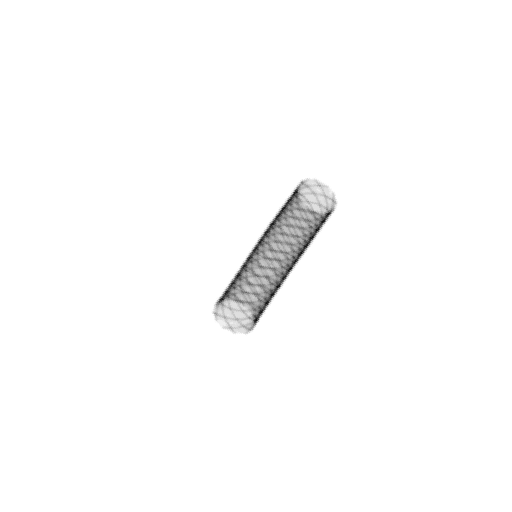

In [7]:
# Set up data augmentation transforms
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=base_img_size, scale=(0.2, 1.0), ratio=(1.0, 1.0)),
    transforms.RandomRotation(degrees=180, fill=2**16 - 1),
]) 

# For each image, create 'augmentation_factor' images with the transforms
augmentation_factor = 10

transformed_img = transform(base_imgs[2])

display(transformed_img)

for base_img in base_imgs:
    break
    for i in range(0, augmentation_factor):    

        transformed_img = transform(base_imgs[i])

In [24]:
transformed_img.save("gt.png")

In [17]:
ar = np.array(transformed_img)
ar_float = ar.astype("float32")
ar_float_norm = np.interp(ar_float, (ar_float.min(), ar_float.max()), (-1, +1))
gauss = np.random.normal(0, 0.7, (512, 512)).astype("float32") 
suma = ar_float_norm + gauss
suma = np.clip(suma, -1, 1)
suma = np.interp(suma, (-1, 1), (0, 2**16-1))
suma = suma.astype('int32')
pil = Image.fromarray(suma, mode='I')
if pil.mode != 'RGB':
    new_p = pil.convert('RGB')

In [31]:
pil = Image.open("data/png/CDStent.png")
ma = np.array(pil)
ma.shape

(1024, 1024)

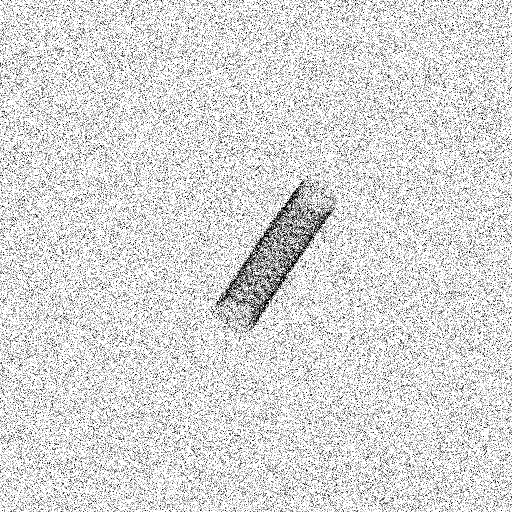

In [22]:
pil

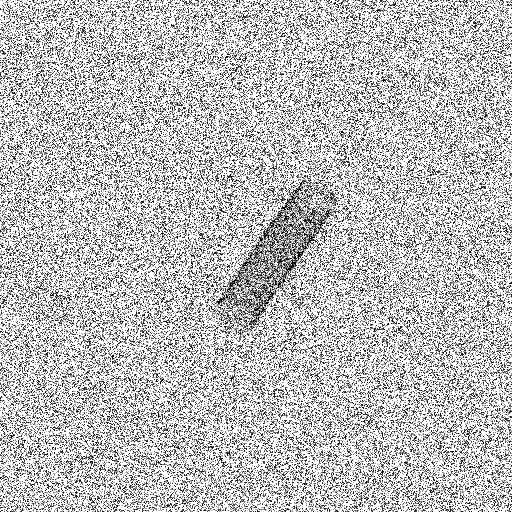

In [21]:
pil.save("test.png")
test = Image.open("test.png")
test = np.array(test, dtype='uint8')
test_pil = Image.fromarray(test)
test_pil

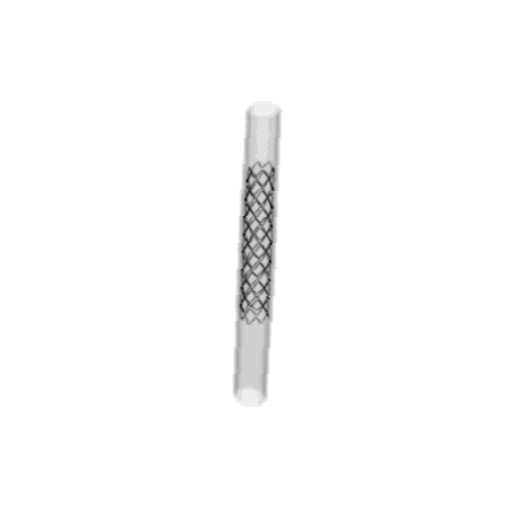

In [ ]:
a = np.array(transformed_img)
b = Image.fromarray(a, mode='I')
b.mode
b

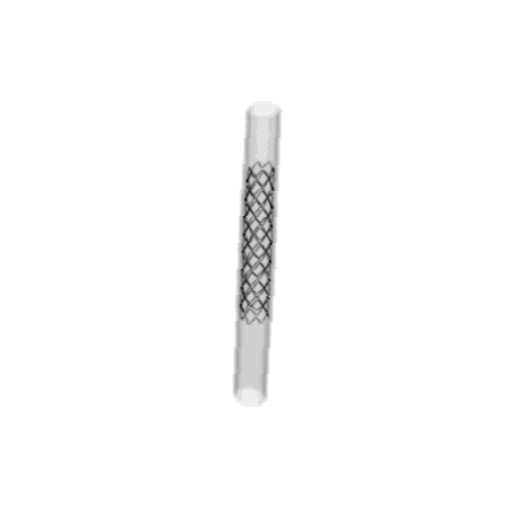

In [ ]:
transformed_img